## Model Construction for S&P 500 Closing Prices - Srihan Cheemangunta

The data will now be used in the GradientRegressor model to evaluate the predicted prices of this model. Here's all the steps for model construction:

1. Import the following needed libraries
2. Load the preprocessed_data.npz file
3. Train and evaluate each model and use RMSE to see which model has the lowest error indicating as the best model. 
4. Make predictions on the entire dataset on the best model.
5. Use testing set on 5% of the data to see how the model works on unseen data.
6. Plot the actual vs predicted lines over time to visualize how well the model did. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading preprocessed data    

I loaded the preprocessed training and testing sets from the 'preprocessed_data.npz' that I had saved on the Data preprocessing notebook. 

In [ ]:
# Load the preprocessed training, test, and full dataset arrays from the npz file
data = np.load('preprocessed_data.npz')

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
X = data['X']
y = data['y']

## Training the Data Using Gradient Boosting Regression

I used several Gradient Boosting Regression models with different hyperparameters to see which model would be the best to use to predict on the data. I evaluated each model by using Root Mean Sqaured Error (RMSE) on the testing set. The lowest RMSE indicated that this is the best model to make predictions on closing price.

In [ ]:
# Using 3 models and using RMSE to compare between models
models = {
    'Model 1': GradientBoostingRegressor(n_estimators=50, learning_rate=0.1),
    'Model 2': GradientBoostingRegressor(n_estimators=100, learning_rate=0.01),
    'Model 3': GradientBoostingRegressor(n_estimators=500, learning_rate=0.001, max_depth=5)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {'RMSE': rmse}
    print(f"{model_name}: RMSE={rmse:.2f}")

Model 1: RMSE=806.03
Model 2: RMSE=1328.05
Model 3: RMSE=1733.01


## Plot Results

The best model is then used to make predictions based on the 'Date' feature. The training set was very successful and follows the S&P 500 actual data curve very closely. I used a small portion of the test set to test the model on dates that it has not seen during training in which the model fails to follow the sharp curve path. This happens since gradient boosting uses tree models which are really good at learning complex patterns with the training data but struggles to look at new data it hasn't seen from training. Each new tree learns the mistakes from the previous tree and gets trained to not make the same mistake which is why the predicted line is following the actual ldata curve really well.

Best Model: Model 1
Mean Actual Price: $2686.69
Mean Predicted Price: $1971.47


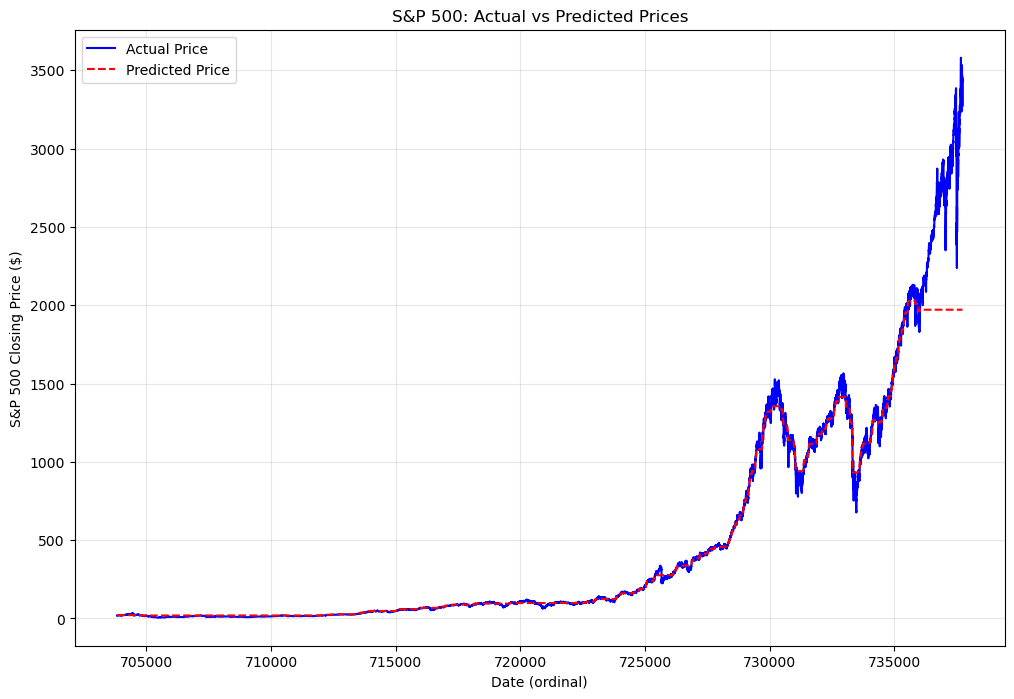

In [5]:
# Selecting the best model based on the lowest RMSE (Root Mean Squared Error)

best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")


test_losses = []
for y_pred in best_model.staged_predict(X_test):
    test_losses.append(mean_squared_error(y_test, y_pred))

# Predicts on the entire dataset 
y_pred_full = best_model.predict(X) 
y_pred_test = best_model.predict(X_test)


mse_test = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse_test)
actual = y_test.mean()
predicted = y_pred_test.mean()

print(f"Mean Actual Price: ${actual:.2f}")
print(f"Mean Predicted Price: ${predicted:.2f}")


plt.figure(figsize=(12, 8))

# Line for the actual price represented with blue color
plt.plot(X, y, label='Actual Price', color='blue')

# Line for the predicted price represented with red color
plt.plot(X, y_pred_full, label='Predicted Price', color='red', linestyle='--')

plt.xlabel('Date (ordinal)')
plt.ylabel('S&P 500 Closing Price ($)')
plt.title('S&P 500: Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




## Convergence Plot

To better understand and visualize how training and testing data went I used a convergence plot. The training loss is decreasing really fast indicating the model converged really fast as the model was able to fit with the data really well. The difference in convergence with the test and training loss is due to the fact that the model doesn't fit the data well when testing on data it hasn't seen before.

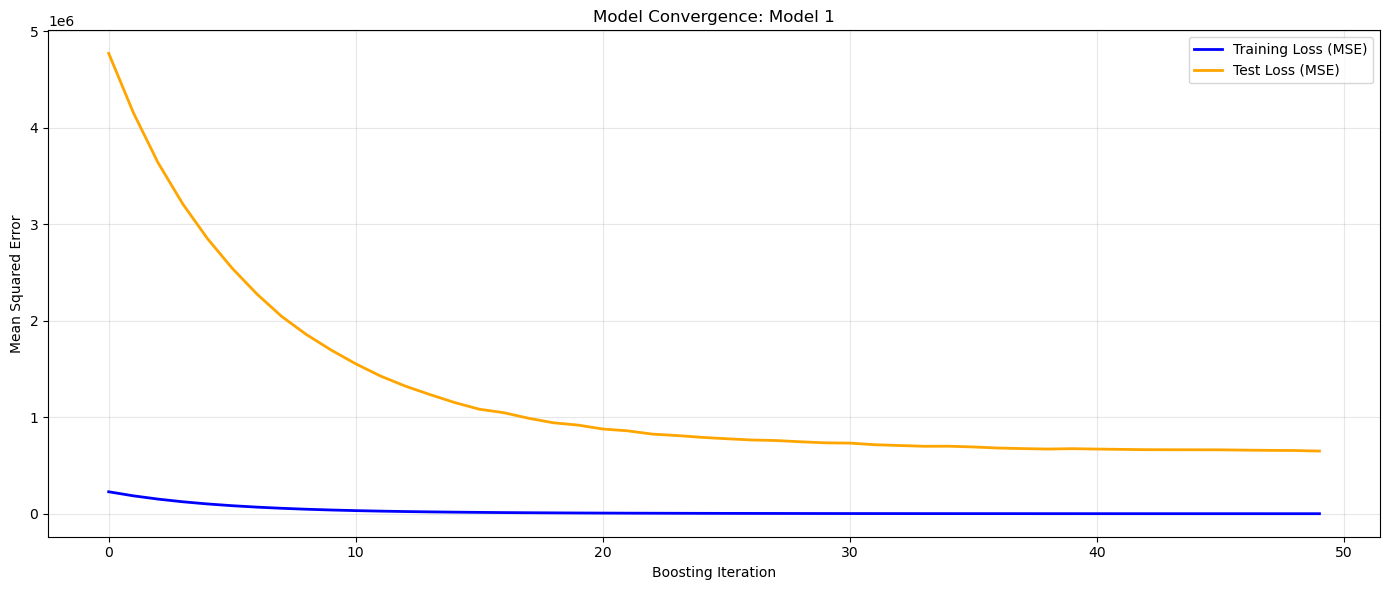

In [ ]:
# Convergence plot to test train and test losses
train_losses = best_model.train_score_
test_losses = []
for y_pred in best_model.staged_predict(X_test):
    test_losses.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(14, 6))
plt.plot(train_losses, label='Training Loss (MSE)', linewidth=2, color='blue')
plt.plot(test_losses, label='Test Loss (MSE)', linewidth=2, color='orange')
plt.xlabel('Boosting Iteration')
plt.ylabel('Mean Squared Error')
plt.title(f'Model Convergence: {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Saving Trained Model and Last Prediction Date for Analysis

After the model makes it's predictions using gradient boosting, we save this trained model so we don't have to retrain the model. We also use the last recent date from the dataset so that the model can make future stock market predictions from the right starting point. 

In [7]:
joblib.dump(best_model, "S&P500_gbrModel.joblib")

last_date_prediction = X.max()
joblib.dump(last_date_prediction, "S&P500_lastDate.joblib")

['S&P500_lastDate.joblib']